In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

In [2]:
training_data = pd.read_csv("data/train.csv")
testing_data = pd.read_csv("data/test.csv")

In [3]:
training_data.shape[0]

891

In [4]:
testing_data.shape[0]

418

In [5]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

useful features: Age, Sex, Pclass

<h2>Missing Values</h2>

In [7]:
training_data2 = training_data[['Age', 'Sex', 'Pclass', 'Survived']].copy()
training_data2.head()

,Age,Sex,Pclass,Survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


In [8]:
training_data2.isnull().sum()

Age         177
Sex           0
Pclass        0
Survived      0
dtype: int64

<h2>Age</h2>

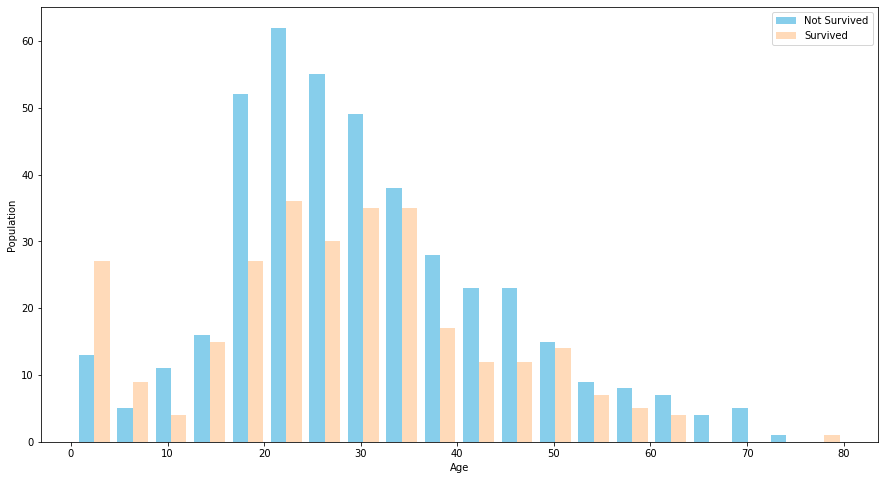

In [9]:
# histogram before fill in missing values
figure = plt.figure(figsize=(15,8))
plt.hist([training_data[training_data['Survived']==0]['Age'],
          training_data[training_data['Survived']==1]['Age']], 
         color = ['skyblue','peachpuff'], bins = 20,
         label = ['Not Survived','Survived'])
plt.xlabel('Age')
plt.ylabel('Population')
plt.legend()

In [10]:
mean_age = training_data['Age'].mean(skipna=True)
mean_age

29.69911764705882

In [11]:
training_data2["Age"].fillna(mean_age, inplace=True)
training_data2.head()

,Age,Sex,Pclass,Survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


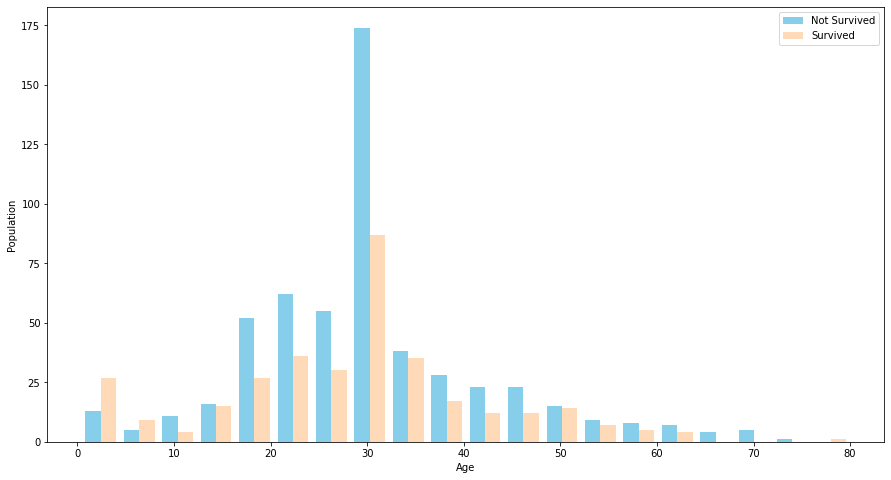

In [12]:
# histogram after fill in missing values
figure = plt.figure(figsize=(15,8))
plt.hist([training_data2[training_data['Survived']==0]['Age'],
          training_data2[training_data['Survived']==1]['Age']], 
         color = ['skyblue','peachpuff'], bins = 20,
         label = ['Not Survived','Survived'])
plt.xlabel('Age')
plt.ylabel('Population')
plt.legend()

<h2>Sex</h2>

<AxesSubplot:>

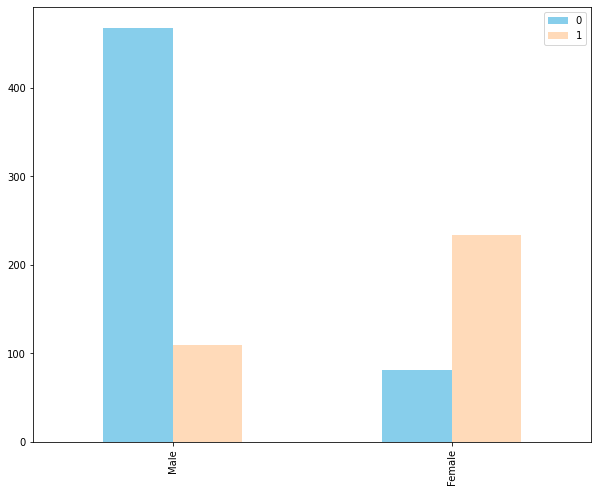

In [13]:
# bar chart of sex
p_male = training_data2[training_data['Sex']=='male']['Survived'].value_counts()
p_female = training_data2[training_data['Sex']=='female']['Survived'].value_counts()
ds = pd.DataFrame([p_male,p_female])
ds.index = ['Male','Female']
ds.plot(kind='bar', figsize=(10,8), color = ['skyblue','peachpuff'],
        label = ['Not Survived','Survived'])


In [14]:
training_data2=pd.get_dummies(training_data2, columns=['Sex'])
training_data2.head()

,Age,Pclass,Survived,Sex_female,Sex_male
0,22.0,3,0,0,1
1,38.0,1,1,1,0
2,26.0,3,1,1,0
3,35.0,1,1,1,0
4,35.0,3,0,0,1


In [15]:
training_data2.drop('Sex_female', axis=1, inplace=True)
training_data2.head()

,Age,Pclass,Survived,Sex_male
0,22.0,3,0,1
1,38.0,1,1,0
2,26.0,3,1,0
3,35.0,1,1,0
4,35.0,3,0,1


<h2>Pclass</h2>

<AxesSubplot:>

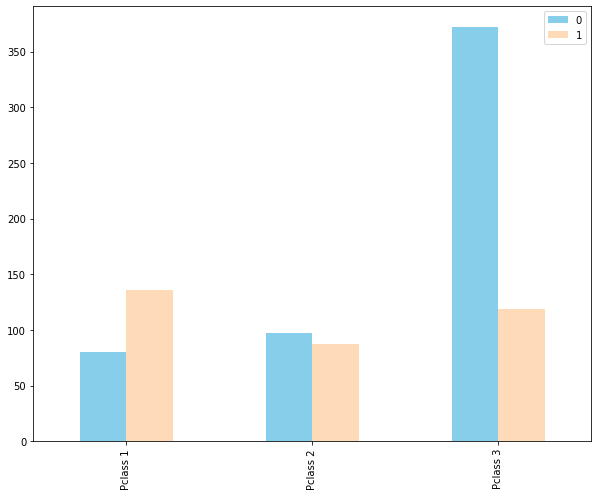

In [16]:
# bar chart of pclass
p_p1 = training_data2[training_data['Pclass']==1]['Survived'].value_counts()
p_p2 = training_data2[training_data['Pclass']==2]['Survived'].value_counts()
p_p3 = training_data2[training_data['Pclass']==3]['Survived'].value_counts()
dp = pd.DataFrame([p_p1, p_p2, p_p3])
dp.index = ['Pclass 1', 'Pclass 2', 'Pclass 3']
dp.plot(kind='bar', figsize=(10,8), color = ['skyblue','peachpuff'],
        label = ['Not Survived','Survived'])

<h2>Model</h2>

In [17]:
train_x = training_data2[['Age', 'Sex_male', 'Pclass']]
train_y = training_data2['Survived']
model = LogisticRegression(multi_class = 'multinomial')
model.fit(train_x, train_y)
model.score(train_x, train_y)

0.8013468013468014

In [18]:
model.predict_proba(train_x)

array([[0.89005381, 0.10994619],
       [0.09546822, 0.90453178],
       [0.41568242, 0.58431758],
       ...,
       [0.4457167 , 0.5542833 ],
       [0.47956027, 0.52043973],
       [0.91852957, 0.08147043]])

<h2>Testing</h2>

In [19]:
testing_data2 = testing_data[['PassengerId', 'Age', 'Sex', 'Pclass']].copy()
testing_data2.isnull().sum()

PassengerId     0
Age            86
Sex             0
Pclass          0
dtype: int64

In [20]:
testing_data2["Age"].fillna(mean_age, inplace=True)
testing_data2=pd.get_dummies(testing_data2, columns=['Sex'])
testing_data2.drop('Sex_female', axis=1, inplace=True)
testing_data2.head()

,PassengerId,Age,Pclass,Sex_male
0,892,34.5,3,1
1,893,47.0,3,0
2,894,62.0,2,1
3,895,27.0,3,1
4,896,22.0,3,0


In [21]:
test_x = testing_data2[['Age', 'Sex_male', 'Pclass']]
testing_pred = model.predict(test_x)

In [22]:
test_res = testing_data2[['PassengerId']].copy()
test_res['Survived'] = testing_pred

# submission = test_res[['PassengerId','Survived']]
test_res.to_csv("submission.csv", index=False)